1. เขียนโปรแกรมแสดงความสัมพันธ์ระหว่าง model และ cost function ของ ridge regression

10 Data

MSE without Regularization: 1.501037663554531
MSE with Ridge Regularization (lambda = 0.1): 3.105674393723551
MSE with Ridge Regularization (lambda = 1.1): 19.152041695413754
MSE with Ridge Regularization (lambda = 0.2): 4.710311123892572


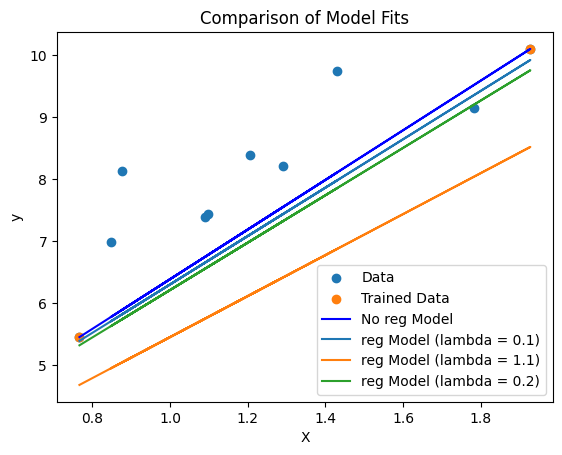

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Normal_Equation(X, Y):
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W

def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train, y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1 * X_test) - y_test) ** 2)
    return S / (len(X_test))

def create_ridge_model(X_train, y_train, lambda_value):
    X = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    A = np.dot(X.T, X) + lambda_value * np.identity(X.shape[1])
    B = np.dot(X.T, y_train)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W

np.random.seed(0)
X = 2 * np.random.rand(10, 1)
y = 4 + 3 * X + np.random.randn(10, 1)
lambda_values = [0.1, 1.1, 0.2] 
X_train, X_test, y_train, y_test = X[8:], X[:8], y[8:], y[:8]
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = Normal_Equation(X_train_bias, y_train)
error = MSE(X_train, X_test, y_train, y_test)
print("MSE without Regularization:", error)

plt.scatter(X, y, label='Data')
plt.scatter(X_train, y_train, label='Trained Data')
plt.plot(X, theta[0] + theta[1] * X, label='No reg Model', color='blue')

for i in lambda_values:
    theta_ridge = create_ridge_model(X_train, y_train, i)
    error_ridge = error + i * theta[1][0] ** 2
    print(f"MSE with Ridge Regularization (lambda = {i}):", error_ridge)
    plt.plot(X, theta_ridge[0] + theta_ridge[1] * X, label=f'reg Model (lambda = {i})')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Model Fits')
plt.legend()
plt.show()


100 Data

MSE with Ridge Regularization (lambda = 1): 5.26044516819892
MSE with Ridge Regularization (lambda = 2): 9.019852672843308
MSE with Ridge Regularization (lambda = 4): 16.538667682132086
MSE with Ridge Regularization (lambda = 10): 39.095112709998425
MSE with Ridge Regularization (lambda = 40): 151.8773378493301
MSE with Ridge Regularization (lambda = 100): 377.44178812799345
MSE with Ridge Regularization (lambda = 1000): 3760.9085423079437


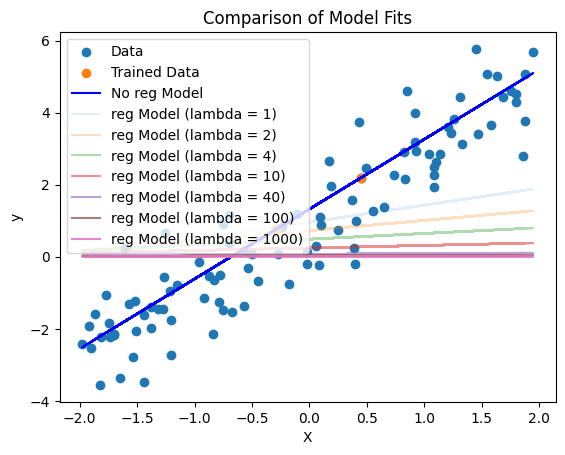

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Normal_Equation(X, Y):
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W

def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train, y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1 * X_test) - y_test) ** 2)
    return S / (len(X_test))

def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test

def create_ridge_model(X_train, y_train, lambda_value):
    X = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    A = np.dot(X.T, X) + lambda_value * np.identity(X.shape[1])
    B = np.dot(X.T, y_train)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W
def ridge_error(lambda_value,slope):
    w0 = 0
    w1 = slope
    S = np.sum(((w0 + w1 * X_test) - y_test) ** 2)+(lambda_value * slope**2)
    return S

np.random.seed(42)
X = 2 * np.random.uniform(-1, 1, size=(100, 1))
y = 1+2*X + np.random.randn(100, 1)
# lambda_values = [x+2 for x in range(100)]
train_size = 0.02
lambda_values =[1,2,4,10,40,100,1000]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
slope_values = np.linspace(-0.1,0.15,100)

X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = Normal_Equation(X_train_bias, y_train)


plt.scatter(X, y, label='Data')
plt.scatter(X_train, y_train, label='Trained Data')
plt.plot(X, theta[0] + theta[1] * X,label='No reg Model', color='blue')
j = 0.125
for i in lambda_values:
    theta_ridge = create_ridge_model(X_train, y_train, i)
    error_ridge = error + i * theta[1][0] ** 2
    print(f"MSE with Ridge Regularization (lambda = {i}):", error_ridge)
    plt.plot(X, theta_ridge[0] + theta_ridge[1] * X, label=f'reg Model (lambda = {i})',alpha = j)
    j +=0.125

    
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of Model Fits')
plt.legend()
plt.show()

Graph RSS and Slope Value

[40.399925903540165, 40.34451009495336, 40.2901804314703, 40.236936913091014, 40.18477953981547, 40.133708311643694, 40.083723228575685, 40.034824290611425, 39.987011497750935, 39.9402848499942, 39.89464434734123, 39.85008998979201, 39.806621777346564, 39.76423971000487, 39.72294378776694, 39.68273401063276, 39.64361037860235, 39.6055728916757, 39.56862154985281, 39.53275635313367, 39.497977301518304, 39.464284395006686, 39.43167763359884, 39.400157017294745, 39.36972254609441, 39.34037421999784, 39.31211203900503, 39.28493600311598, 39.25884611233069, 39.23384236664916, 39.20992476607139, 39.187093310597376, 39.16534800022713, 39.14468883496063, 39.12511581479791, 39.10662893973893, 39.08922820978373, 39.07291362493227, 39.05768518518458, 39.04354289054065, 39.03048674100049, 39.018516736564074, 39.00763287723143, 38.997835163002534, 38.98912359387741, 38.98149816985604, 38.97495889093844, 38.96950575712458, 38.9651387684145, 38.96185792480817, 38.959663226305594, 38.95855467290679, 3

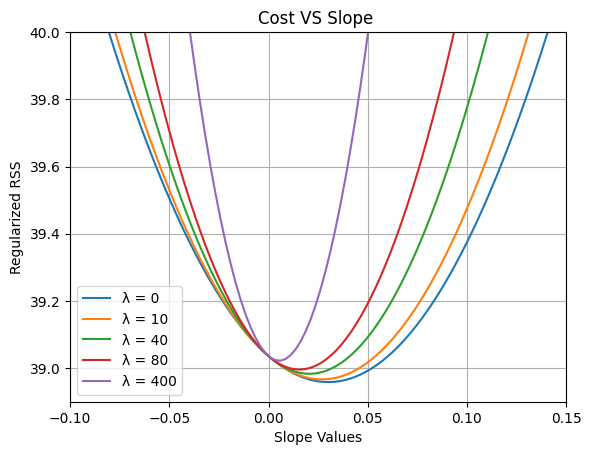

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def Normal_Equation(X, Y):
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W

def MSE(X_train, X_test, y_train, y_test):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train, y_train)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1 * X_test) - y_test) ** 2)
    return S / (len(X_test))

def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test

def ridge_error(lambda_value,slope):
    
    w0 = 0
    w1 = slope
    S = np.sum(((w0 + w1 * X_test) - y_test) ** 2)+(lambda_value * slope**2)
    return S


np.random.seed(42)
X = 2 * np.random.uniform(-1, 1, size=(10, 1))
y = np.sin(np.pi * X).ravel()

train_size = 0.2
lambda_values =[0,10,40,80,400]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
slope_values = np.linspace(-0.1,0.15,100)


for i in lambda_values:
    errors = []
    for j in slope_values:
        error_ridge = ridge_error(i,j)
        errors.append(error_ridge)
    print(errors)

    plt.plot(slope_values, errors, label=f'λ = {i}')

plt.xlabel('Slope Values')
plt.ylabel('Regularized RSS')
plt.ylim(38.9,40)
plt.xlim(-0.1,0.15)

plt.title('Cost VS Slope ')
plt.legend()
plt.grid(True)
plt.show()

2. เขียนโปรแกรมแสดงความสัมพันธ์ระหว่าง complexity ของ model และ etrain, etest ของ ridge regression

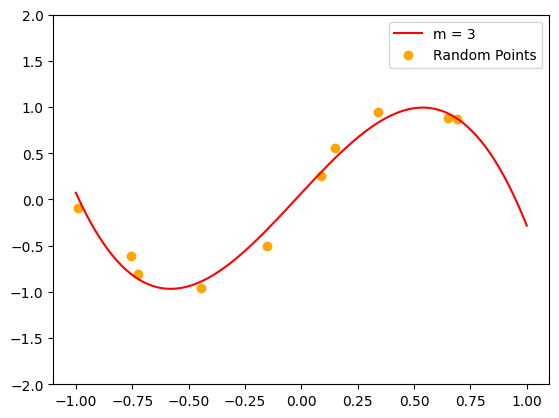

In [47]:
import numpy as np
from pandas import *
import math
import matplotlib.pyplot as plt
import pandas as pd

def create_ridge_model(X, Y, lambda_value):
    try:
        iden = np.identity(X.shape[1])
        iden[0] = 0 
        A = np.dot(X.T, X) + lambda_value * iden
        B = np.dot(X.T, Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I, B)
        return W
    except:
        pass

def Normal_Equation(X,Y):
    try:
        A = np.dot(X.T ,X)
        B = np.dot(X.T , Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I,B)
        return W
    except:
        pass

def MSE_upgrade(theta, X_test, y_test):
    W = theta
    S = 0
    for j in range(len(W)):
        S += ((W[j] * X_test ** j))
    S = (S - y_test)**2
    return (np.mean(S))

def training (X, Y, Degree):
    X_with_intercept = np.ones((X.shape[0], 1))
    for i in range(1,Degree+1):
        X_with_intercept = np.c_[X_with_intercept , X ** i]
    theta = Normal_Equation(X_with_intercept, Y)
    MSE = ((MSE_upgrade(theta, X, Y)))
    return MSE , theta

def E_out(y_bar,arrayY,AllModel_array):
    bias_value = np.mean((y_bar - arrayY)**2)
    variant_value = np.mean((AllModel_array - y_bar)**2)
    return bias_value + variant_value
    
E_in_main = []
E_out_main = []
Degree = range(10)
Lam = range(-60,1,5)
x = np.linspace(-1,1,100)
np.random.seed(100)
x = np.linspace(-1,1,100)
E_in_list = []
model_list = []
arrayY = np.sin(np.pi * x)
X = np.random.uniform(-1,1,size=(10))
# Y = np.sin(np.pi * X)
Y = np.sin(np.pi * X) + np.random.normal(0, 0.1, size=(10))
try:
    # E_in , theta = cross_validation(X,Y,5,j)
    E_in , theta = training(X, Y,3)
    y = theta[0]
    for j in range(1,len(theta)):
        y = y + theta[j] * x ** j

    model_list.append(y)
    E_in_list.append(E_in)
except:
    pass
array_model = np.array(model_list)
y_bar = np.average(model_list,axis=0)
E_out_main.append(E_out(y_bar, arrayY, array_model))
E_in_main.append(np.mean(E_in_list))

# print(E_out_main)
plt.plot(x, y_bar,color='red', label= 'm = 3')
plt.scatter(X, Y, color='orange', label='Random Points')
plt.ylim([-2,2])
plt.legend()

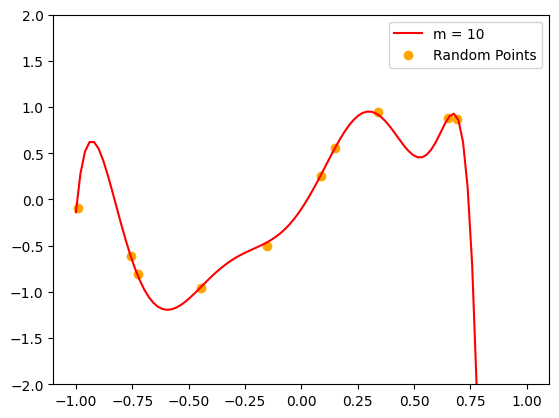

In [46]:
import numpy as np
from pandas import *
import math
import matplotlib.pyplot as plt
import pandas as pd

def create_ridge_model(X, Y, lambda_value):
    try:
        iden = np.identity(X.shape[1])
        iden[0] = 0 
        A = np.dot(X.T, X) + lambda_value * iden
        B = np.dot(X.T, Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I, B)
        return W
    except:
        pass

def Normal_Equation(X,Y):
    try:
        A = np.dot(X.T ,X)
        B = np.dot(X.T , Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I,B)
        return W
    except:
        pass

def MSE_upgrade(theta, X_test, y_test):
    W = theta
    S = 0
    for j in range(len(W)):
        S += ((W[j] * X_test ** j))
    S = (S - y_test)**2
    return (np.mean(S))

def training (X, Y, Degree):
    X_with_intercept = np.ones((X.shape[0], 1))
    for i in range(1,Degree+1):
        X_with_intercept = np.c_[X_with_intercept , X ** i]
    theta = Normal_Equation(X_with_intercept, Y)
    MSE = ((MSE_upgrade(theta, X, Y)))
    return MSE , theta

def E_out(y_bar,arrayY,AllModel_array):
    bias_value = np.mean((y_bar - arrayY)**2)
    variant_value = np.mean((AllModel_array - y_bar)**2)
    return bias_value + variant_value
    
E_in_main = []
E_out_main = []
Degree = range(10)
Lam = range(-60,1,5)
x = np.linspace(-1,1,100)
np.random.seed(100)
x = np.linspace(-1,1,100)
E_in_list = []
model_list = []
arrayY = np.sin(np.pi * x)
X = np.random.uniform(-1,1,size=(10))
# Y = np.sin(np.pi * X)
Y = np.sin(np.pi * X) + np.random.normal(0, 0.1, size=(10))
try:
    # E_in , theta = cross_validation(X,Y,5,j)
    E_in , theta = training(X, Y,10)
    y = theta[0]
    for j in range(1,len(theta)):
        y = y + theta[j] * x ** j

    model_list.append(y)
    E_in_list.append(E_in)
except:
    pass
array_model = np.array(model_list)
y_bar = np.average(model_list,axis=0)
E_out_main.append(E_out(y_bar, arrayY, array_model))
E_in_main.append(np.mean(E_in_list))

# print(E_out_main)
plt.plot(x, y_bar,color='red', label= 'm = 10')
plt.scatter(X, Y, color='orange', label='Random Points')
plt.ylim([-2,2])
plt.legend()

(0.0, 1.0)

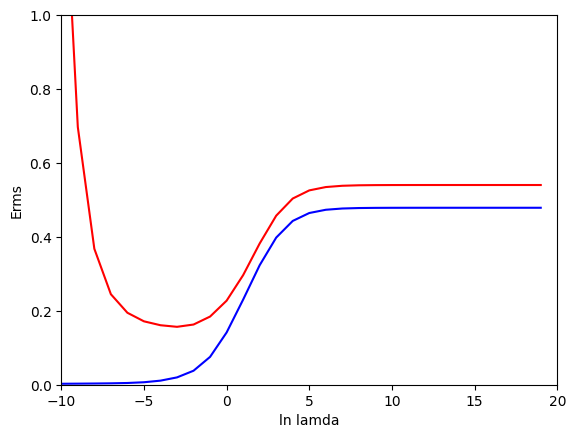

In [5]:
import numpy as np
from pandas import *
import math
import matplotlib.pyplot as plt
import pandas as pd

def create_ridge_model(X, Y, lambda_value):
    try:
        iden = np.identity(X.shape[1])
        iden[0] = 0 
        A = np.dot(X.T, X) + lambda_value * iden
        B = np.dot(X.T, Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I, B)
        return W
    except:
        pass

def MSE_upgrade(theta, X_test, y_test):
    W = theta
    S = 0
    for j in range(len(W)):
        S += ((W[j] * X_test ** j))
    S = (S - y_test)**2
    return (np.mean(S))

def training (X, Y, Degree, lambda_value):
    X_with_intercept = np.ones((X.shape[0], 1))
    for i in range(1,Degree+1):
        X_with_intercept = np.c_[X_with_intercept , X ** i]
    theta = create_ridge_model(X_with_intercept, Y, lambda_value)
    MSE = ((MSE_upgrade(theta, X, Y)))
    return MSE , theta

def E_out(y_bar,arrayY,AllModel_array):
    bias_value = np.mean((y_bar - arrayY)**2)
    variant_value = np.mean((AllModel_array - y_bar)**2)
    return bias_value + variant_value

E_in_main = []
E_out_main = []
Degree = range(10)
Lam = range(-40,20)
x = np.linspace(-1,1,100)
for i in Lam:
    E_in_list = []
    model_list = []
    arrayY = np.sin(np.pi * x)
    for j in range(100):
        np.random.seed(j)
        X = np.random.uniform(-1,1,size=(10))
        # Y = np.sin(np.pi * X)
        Y = np.sin(np.pi * X) + np.random.normal(0, 0.1, size=(10))
        try:
            # E_in , theta = cross_validation(X,Y,5,j)
            E_in , theta = training(X, Y, 10, np.e**(i))
            y = theta[0]
            for j in range(1,len(theta)):
                y = y + theta[j] * x ** j

            model_list.append(y)
            E_in_list.append(E_in)
        except:
            pass
    array_model = np.array(model_list)
    y_bar = np.average(model_list,axis=0)
    E_out_main.append(E_out(y_bar, arrayY, array_model))
    E_in_main.append(np.mean(E_in_list))

# plt.plot(x, y_bar,color='red')
# plt.scatter(X, Y, color='orange', label='Random Points')
# plt.ylim([-2,2])
plt.plot(Lam, E_in_main,color='blue',label='Train')
plt.plot(Lam, E_out_main,color='red',label='Test')
plt.xlabel("ln lamda")
plt.ylabel("Erms")
plt.xlim([-10,20])
plt.ylim([0,1])

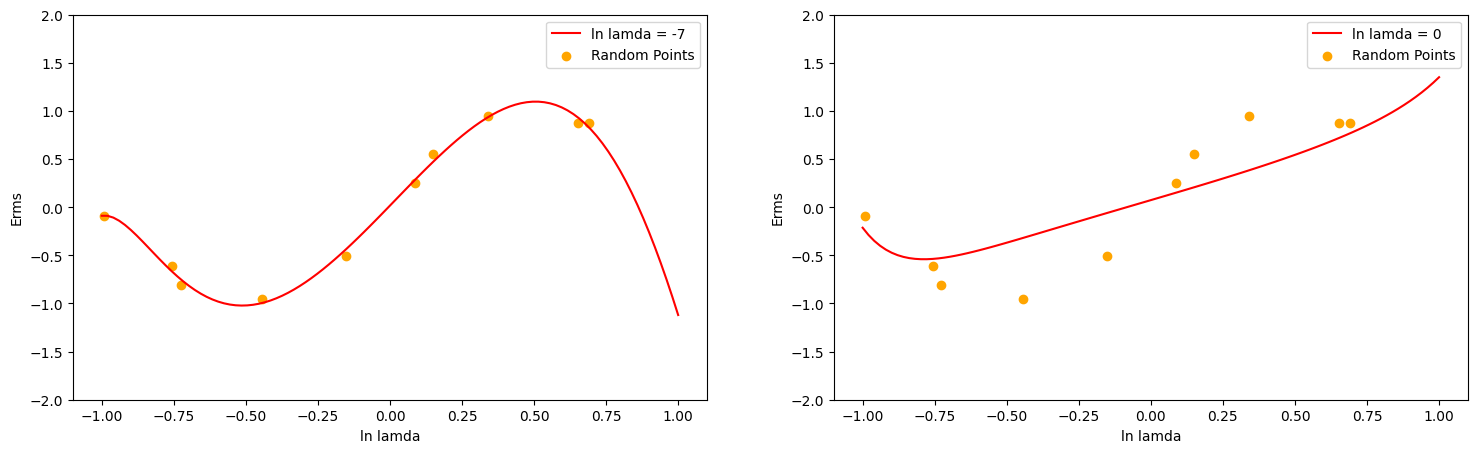

In [7]:
import numpy as np
from pandas import *
import math
import matplotlib.pyplot as plt
import pandas as pd

def create_ridge_model(X, Y, lambda_value):
    try:
        iden = np.identity(X.shape[1])
        iden[0] = 0 
        A = np.dot(X.T, X) + lambda_value * iden
        B = np.dot(X.T, Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I, B)
        return W
    except:
        pass

def MSE_upgrade(theta, X_test, y_test):
    W = theta
    S = 0
    for j in range(len(W)):
        S += ((W[j] * X_test ** j))
    S = (S - y_test)**2
    return (np.mean(S))

def training (X, Y, Degree, lambda_value):
    X_with_intercept = np.ones((X.shape[0], 1))
    for i in range(1,Degree+1):
        X_with_intercept = np.c_[X_with_intercept , X ** i]
    theta = create_ridge_model(X_with_intercept, Y, lambda_value)
    MSE = ((MSE_upgrade(theta, X, Y)))
    return MSE , theta

def E_out(y_bar,arrayY,AllModel_array):
    bias_value = np.mean((y_bar - arrayY)**2)
    variant_value = np.mean((AllModel_array - y_bar)**2)
    return bias_value + variant_value

list_lam = [-7,0]
plt.figure(figsize=(18, 5))
for m in range(len(list_lam)):
    E_in_main = []
    E_out_main = []
    Degree = range(10)
    Lam = range(-60,1,5)
    x = np.linspace(-1,1,100)
    np.random.seed(100)
    x = np.linspace(-1,1,100)
    E_in_list = []
    model_list = []
    arrayY = np.sin(np.pi * x)
    X = np.random.uniform(-1,1,size=(10))
    # Y = np.sin(np.pi * X)
    Y = np.sin(np.pi * X) + np.random.normal(0, 0.1, size=(10))
    try:
        # E_in , theta = cross_validation(X,Y,5,j)
        E_in , theta = training(X, Y, 10, np.e**(list_lam[m]))
        y = theta[0]
        for j in range(1,len(theta)):
            y = y + theta[j] * x ** j

        model_list.append(y)
        E_in_list.append(E_in)
    except:
        pass
    array_model = np.array(model_list)
    y_bar = np.average(model_list,axis=0)
    E_out_main.append(E_out(y_bar, arrayY, array_model))
    E_in_main.append(np.mean(E_in_list))

    plt.subplot(1 , 2 , m+1)
    plt.plot(x, y_bar,color='red', label=f'ln lamda = {list_lam[m]}')
    plt.scatter(X, Y, color='orange', label='Random Points')
    plt.xlabel("ln lamda")
    plt.ylabel("Erms")
    plt.ylim([-2,2])
    plt.legend()

3. เขียนโปรแกรมสำหรับเปรียบเทียบค่าคลาดเคลื่อนนอกตัวอย่างของแบบจำลองเชิงเส้นที่มีและไม่มีการทำให้เป็นปรกติ

without Regularization

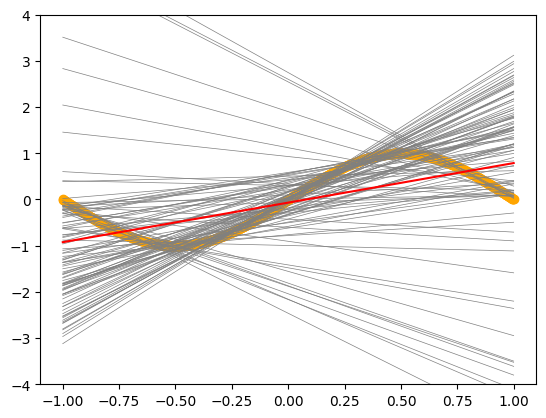

In [2]:
import numpy as np
from pandas import *
import math
import matplotlib.pyplot as plt
import pandas as pd

def Normal_Equation(X,Y):
    try:
        A = np.dot(X.T ,X)
        B = np.dot(X.T , Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I,B)
        return W
    except:
        pass

def MSE_upgrade(theta, X_test, y_test):
    W = theta
    S = 0
    for j in range(len(W)):
        S += ((W[j] * X_test ** j))
    S = (S - y_test)**2
    return (np.mean(S))

def training (X, Y, Degree, lambda_value):
    X_with_intercept = np.ones((X.shape[0], 1))
    for i in range(1,Degree+1):
        X_with_intercept = np.c_[X_with_intercept , X ** i]
    theta = create_ridge_model(X_with_intercept, Y, lambda_value)
    MSE = ((MSE_upgrade(theta, X, Y)))
    return MSE , theta

def create_ridge_model(X, Y, lambda_value):
    try:
        iden = np.identity(X.shape[1])
        iden[0] = 0 
        A = np.dot(X.T, X) + lambda_value * iden
        B = np.dot(X.T, Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I, B)
        return W
    except:
        pass

def E_out(y_bar,arrayY,AllModel_array):
    bias_value = np.mean((y_bar - arrayY)**2)
    variant_value = np.mean((AllModel_array - y_bar)**2)
    return bias_value , variant_value

####Linear regression####
x = np.linspace(-1,1,1000)
E_in_list = []
model_list = []
arrayY = np.sin(np.pi * x)
for j in range(100):
    np.random.seed(j)
    X = np.random.uniform(-1,1,size=(2))
    Y = np.sin(np.pi * X)
    # Y = np.sin(np.pi * X) + np.random.normal(0, 0.1, size=(10))
    try:
        # E_in , theta = cross_validation(X,Y,5,j)
        E_in , theta = training(X, Y, 1 ,np.e**(-100))
        y = theta[0]
        for j in range(1,len(theta)):
            y = y + theta[j] * x ** j

        model_list.append(y)
        E_in_list.append(E_in)
    except:
        pass
    plt.plot(x, y,color='grey',linewidth = 0.5,alpha=1)

plt.scatter(x, arrayY, color='orange', label='Random Points')
plt.ylim([-4,4])
array_model = np.array(model_list)
y_bar = np.average(model_list,axis=0)
plt.plot(x, y_bar,color='red')


with Regularization

0.2784484813634152
0.3983351576415006


(-4.0, 4.0)

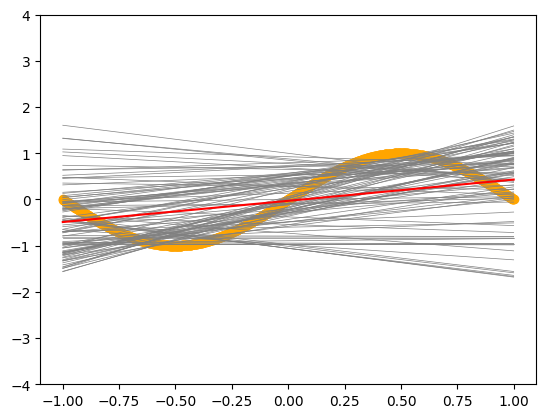

In [3]:
import numpy as np
from pandas import *
import math
import matplotlib.pyplot as plt
import pandas as pd

def Normal_Equation(X,Y):
    try:
        A = np.dot(X.T ,X)
        B = np.dot(X.T , Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I,B)
        return W
    except:
        pass

def MSE_upgrade(theta, X_test, y_test):
    W = theta
    S = 0
    for j in range(len(W)):
        S += ((W[j] * X_test ** j))
    S = (S - y_test)**2
    return (np.mean(S))

def training (X, Y, Degree, lambda_value):
    X_with_intercept = np.ones((X.shape[0], 1))
    for i in range(1,Degree+1):
        X_with_intercept = np.c_[X_with_intercept , X ** i]
    theta = create_ridge_model(X_with_intercept, Y, lambda_value)
    MSE = ((MSE_upgrade(theta, X, Y)))
    return MSE , theta

def create_ridge_model(X, Y, lambda_value):
    try:
        iden = np.identity(X.shape[1])
        iden[0] = 0 
        A = np.dot(X.T, X) + lambda_value * iden
        B = np.dot(X.T, Y)
        A_I = np.linalg.inv(A)
        W = np.dot(A_I, B)
        return W
    except:
        pass

def E_out(y_bar,arrayY,AllModel_array):
    bias_value = np.mean((y_bar - arrayY)**2)
    variant_value = np.mean((AllModel_array - y_bar)**2)
    return bias_value , variant_value

####Ridge####
x = np.linspace(-1,1,1000)
E_in_list = []
model_list = []
arrayY = np.sin(np.pi * x)
for j in range(100):
    np.random.seed(j)
    X = np.random.uniform(-1,1,size=(2))
    Y = np.sin(np.pi * X)
    # Y = np.sin(np.pi * X) + np.random.normal(0, 0.1, size=(10))
    try:
        # E_in , theta = cross_validation(X,Y,5,j)
        E_in , theta = training(X, Y, 1 ,np.e**(-1.8))
        y = theta[0]
        for j in range(1,len(theta)):
            y = y + theta[j] * x ** j

        model_list.append(y)
        E_in_list.append(E_in)
    except:
        pass
    plt.plot(x, y,color='grey',linewidth = 0.5,alpha=1)

array_model = np.array(model_list)
y_bar = np.average(model_list,axis=0)
bias , variant = (E_out(y_bar, arrayY, array_model))
variant_array = np.mean((array_model - y_bar)**2,axis=0)
print(bias)
print(variant)
plt.plot(x, y_bar,color='red')
plt.scatter(x, arrayY, color='orange', label='Random Points')
plt.ylim([-4,4])

without Regularization
Bias value: 0.20227065789827928
variance value: 1.6997408781349916


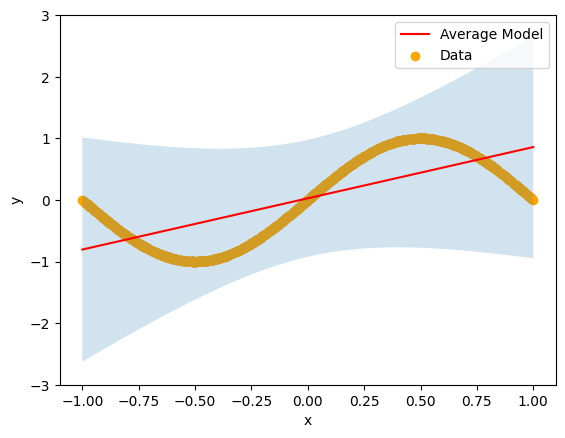

with Regularization
Bias value: 0.22988185251736035
variace value: 0.33497181948583377


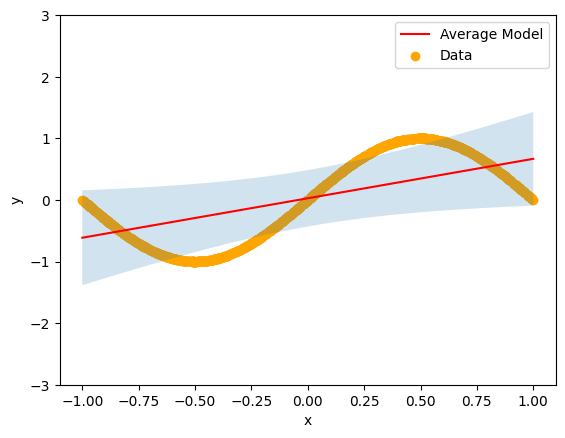

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Normal_Equation(X,Y):
    A = np.dot(X.T ,X)
    B = np.dot(X.T , Y)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I,B)
    return W

def MSE ():
    theta = Normal_Equation(X_with_intercept,Y)
    w0 = theta[0]
    w1 = theta[1]
    S = 0
    S = np.sum(((w0 + w1*X)-Y)**2)
    return S/(2*len(X))

def MSE(X_train, X_test, y_train, y_test, lamda):
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    theta = Normal_Equation(X_train, y_train)
    w = create_ridge_model(X_train, y_train, lamda)
    w0 = theta[0]
    w1 = theta[1]
    S = np.sum(((w0 + w1 * X_test) - y_test) ** 2)
    W = 0
    for i in w:
        W += i**2
    return (S / 2*len(X_test)) + (lamda * W / 2*len(X_test))

def create_ridge_model(X_train, y_train, lambda_value):
    X = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    A = np.dot(X.T, X) + lambda_value * np.identity(X.shape[1])
    B = np.dot(X.T, y_train)
    A_I = np.linalg.inv(A)
    W = np.dot(A_I, B)
    return W

def train_test_split(X, y, train_size):
    n_samples = len(X)
    n_train = int(n_samples * train_size)
    indices = np.random.permutation(n_samples)
    X_test = X[indices[:-n_train]]
    y_test = y[indices[:-n_train]]
    X_train = X[indices[-n_train:]]
    y_train = y[indices[-n_train:]]
    return X_train, X_test, y_train, y_test


lines = []
z = np.random.uniform(-1, 1, size=(1000, 1))
listTheta = []
AllModel = []
listTheta_ridge = []
AllModel_ridge = []
x = np.linspace(-1, 1, 1000)

for i in range(5000):
  X = np.random.choice(z.ravel(), size=2, replace=False)
  X = np.array(X)
  X = X.reshape(-1, 1)
  Y = np.sin(np.pi * X)

  X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

  theta = Normal_Equation(X_with_intercept, Y)
  listTheta.append(theta)
  y = theta[0] + theta[1]*x
  AllModel.append(y)

  
  theta_ridge = create_ridge_model(X, Y, np.e**(-2.35))
  listTheta_ridge.append(theta_ridge)
  y = theta_ridge[0] + theta_ridge[1]*x
  AllModel_ridge.append(y)



mean_theta = np.average(listTheta,axis=0)
arrayY = np.array(np.sin(np.pi * x))
y_bar = mean_theta[0] + mean_theta[1]*x
AllModel_array = np.array(AllModel)


mean_theta_ridge = np.average(listTheta_ridge,axis=0)
y_bar_ridge = mean_theta_ridge[0] + mean_theta_ridge[1] * x
AllModel_array_ridge = np.array(AllModel_ridge)


z = np.random.uniform(-1, 1, size=(1000, 1))
a = np.sin(np.pi * z)

##linear regression
bias_value = np.mean((y_bar - arrayY)**2)
variance_value = np.mean((AllModel_array- y_bar)**2)

print('without Regularization')
print("Bias value:", bias_value)
print("variance value:", variance_value)

std_value = np.mean((AllModel_array- y_bar)**2, axis=0)

# Calculate the standard deviation across all regression lines for each x-value
std_dev = np.std(AllModel_array, axis=0)

# Calculate the upper and lower bounds for the confidence interval
upper_bound = y_bar + np.sqrt(std_value)
lower_bound = y_bar - np.sqrt(std_value)

# Plot the confidence interval for linear regression
plt.plot(x, y_bar, color='red', label='Average Model')
plt.scatter(z, a, color='orange', label='Data')
plt.fill_between(x, upper_bound, lower_bound, alpha=0.2)

plt.ylim([-3,3])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


##ridge
bias_value = np.mean((y_bar_ridge - arrayY)**2)
variance_value = np.mean((AllModel_array_ridge - y_bar_ridge)**2)

print('with Regularization')
print("Bias value:", bias_value)
print("variace value:", variance_value)

std_value = np.mean((AllModel_array_ridge - y_bar_ridge)**2, axis=0)

# Similar process for ridge regression
# Calculate the standard deviation for ridge regression
std_dev_ridge = np.std(AllModel_array_ridge, axis=0)

# Calculate the upper and lower bounds for the confidence interval
upper_bound_ridge = y_bar_ridge + np.sqrt(std_value)
lower_bound_ridge = y_bar_ridge - np.sqrt(std_value)

# Plot the confidence interval for ridge regression
plt.plot(x, y_bar_ridge, color='red', label='Average Model')
plt.scatter(z, a, color='orange', label='Data')
plt.fill_between(x, upper_bound_ridge, lower_bound_ridge, alpha=0.2)

plt.ylim([-3,3])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
